In [1]:
# Read and converting the input file to proper CSV format
import pandas as pd
data = pd.read_csv(r"household_power_consumption.txt",delimiter=";")
data.to_csv("household_power_consumption.csv",index=False)

In [2]:
# Show the dataset
display(data)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
1485323,13/10/2009,04:47:00,0.294,0.084,239.700,1.200,0.000,2.000,1.0
1485324,13/10/2009,04:48:00,0.294,0.084,239.820,1.200,0.000,1.000,0.0
1485325,13/10/2009,04:49:00,0.292,0.082,239.320,1.200,0.000,1.000,1.0
1485326,13/10/2009,04:50:00,0.292,0.084,239.860,1.200,0.000,1.000,0.0


In [3]:
# Print the data type details
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485328 entries, 0 to 1485327
Data columns (total 9 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Date                   1485328 non-null  object 
 1   Time                   1485328 non-null  object 
 2   Global_active_power    1485328 non-null  object 
 3   Global_reactive_power  1485328 non-null  object 
 4   Voltage                1485327 non-null  object 
 5   Global_intensity       1485327 non-null  object 
 6   Sub_metering_1         1485327 non-null  object 
 7   Sub_metering_2         1485327 non-null  object 
 8   Sub_metering_3         1476980 non-null  float64
dtypes: float64(1), object(8)
memory usage: 102.0+ MB


In [4]:
# Cleaning data
import numpy as np
data.replace('?', np.nan, inplace=True)
data.dropna(inplace=True)

# Converting to proper datatypes depends on the actual format
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y').dt.strftime('%d/%m/%Y')
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S').dt.time
data['Global_active_power'] = data['Global_active_power'].astype(float)
data['Global_reactive_power'] = data['Global_reactive_power'].astype(float)
data['Voltage'] = data['Voltage'].astype(float)
data['Global_intensity'] = data['Global_intensity'].astype(float)
data['Sub_metering_1'] = data['Sub_metering_1'].astype(float)
data['Sub_metering_2'] = data['Sub_metering_2'].astype(float)

In [5]:
# Cross check the datatype after processed
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1476980 entries, 0 to 1485326
Data columns (total 9 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Date                   1476980 non-null  object 
 1   Time                   1476980 non-null  object 
 2   Global_active_power    1476980 non-null  float64
 3   Global_reactive_power  1476980 non-null  float64
 4   Voltage                1476980 non-null  float64
 5   Global_intensity       1476980 non-null  float64
 6   Sub_metering_1         1476980 non-null  float64
 7   Sub_metering_2         1476980 non-null  float64
 8   Sub_metering_3         1476980 non-null  float64
dtypes: float64(7), object(2)
memory usage: 112.7+ MB


In [6]:
# Display the data based on updated datatypes
display(data.head())

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


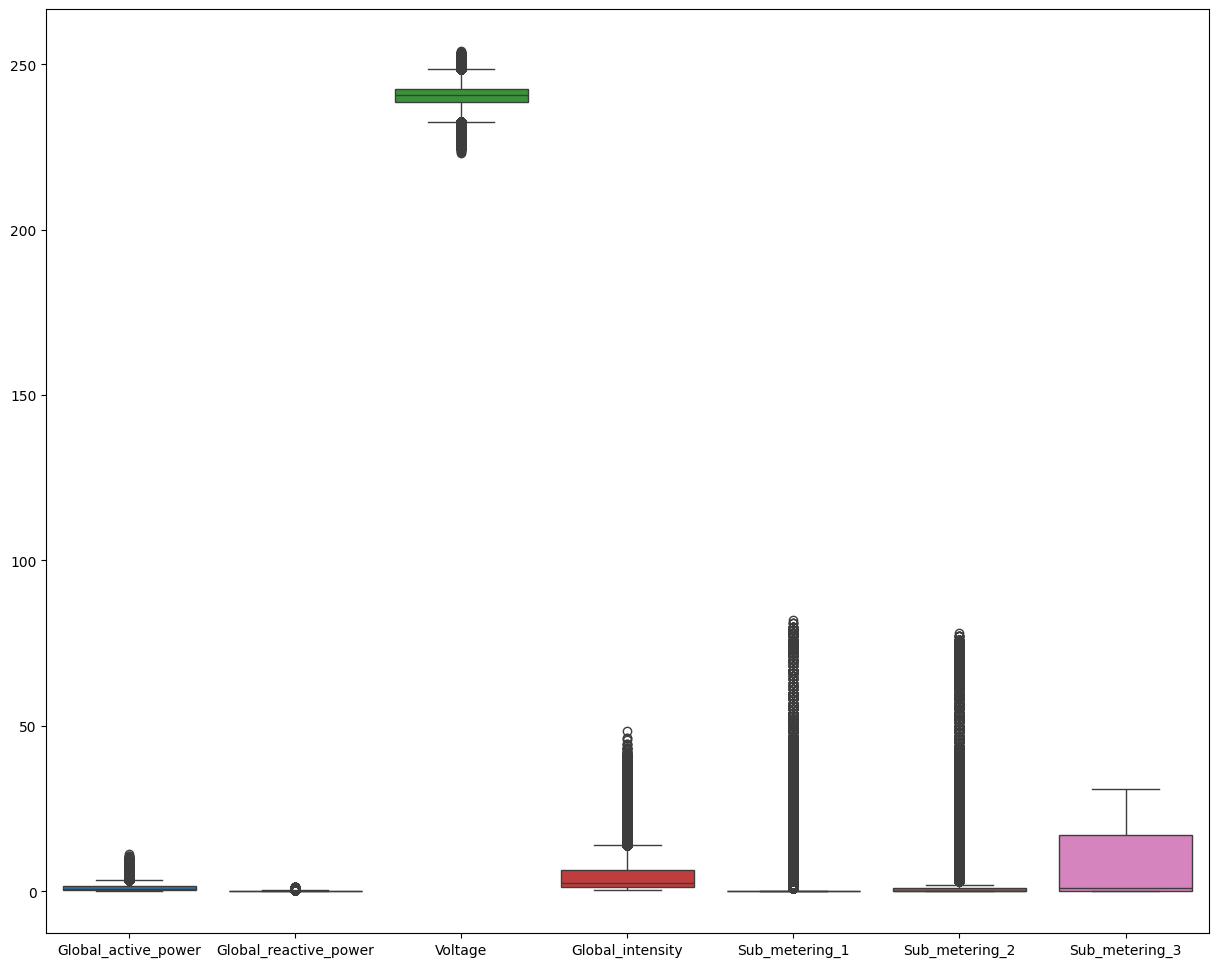

In [7]:
#Outliers Check
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 12))
sns.boxplot(data=data[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3']], showfliers=True)
plt.show()

In [8]:
data.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,1.476980e+06,1.476980e+06,1.476980e+06,1.476980e+06,1.476980e+06,1.476980e+06,1.476980e+06
mean,1.085554e+00,1.216528e-01,2.404983e+02,4.614729e+00,1.148076e+00,1.365138e+00,6.094011e+00
std,1.087903e+00,1.113261e-01,3.269560e+00,4.576315e+00,6.253345e+00,6.042615e+00,8.283206e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.960000e-01,4.600000e-02,2.386200e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.500000e-01,1.000000e-01,2.407300e+02,2.400000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.520000e+00,1.920000e-01,2.426200e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.539400e+02,4.840000e+01,8.200000e+01,7.800000e+01,3.100000e+01


In [9]:
import pandas as pd
import numpy as np

# List of numeric columns to check for outliers
numeric_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage',
                'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

# Ensure the numeric columns are in float format
data[numeric_cols] = data[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Compute IQR bounds for each numeric column
Q1 = data[numeric_cols].quantile(0.25)
Q3 = data[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Filter out rows where any column value is outside IQR bounds
condition = ~((data[numeric_cols] < (Q1 - 1.5 * IQR)) |
              (data[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Create the cleaned dataset
data_cleaned = data[condition].reset_index(drop=True)

# Optional: Print shape before and after
print("Original shape:", data.shape)
print("Shape after removing outliers:", data_cleaned.shape)


Original shape: (1476980, 9)
Shape after removing outliers: (1254865, 9)


In [10]:
# Check missing value in Sub_metering_1
print(data_cleaned['Sub_metering_1'].isna().sum())
print(data['Sub_metering_1'].isna().sum())

# Check unique values
print(data_cleaned['Sub_metering_1'].nunique())
print(data['Sub_metering_1'].isna().nunique())

0
0
1
1


                       Global_active_power  Global_reactive_power   Voltage  \
Global_active_power               1.000000               0.114542 -0.272199   
Global_reactive_power             0.114542               1.000000 -0.049739   
Voltage                          -0.272199              -0.049739  1.000000   
Global_intensity                  0.998343               0.141026 -0.283926   
Sub_metering_2                    0.016396               0.437976 -0.024472   
Sub_metering_3                    0.748655               0.022245 -0.238297   

                       Global_intensity  Sub_metering_2  Sub_metering_3  
Global_active_power            0.998343        0.016396        0.748655  
Global_reactive_power          0.141026        0.437976        0.022245  
Voltage                       -0.283926       -0.024472       -0.238297  
Global_intensity               1.000000        0.028417        0.739350  
Sub_metering_2                 0.028417        1.000000       -0.009896  
Su

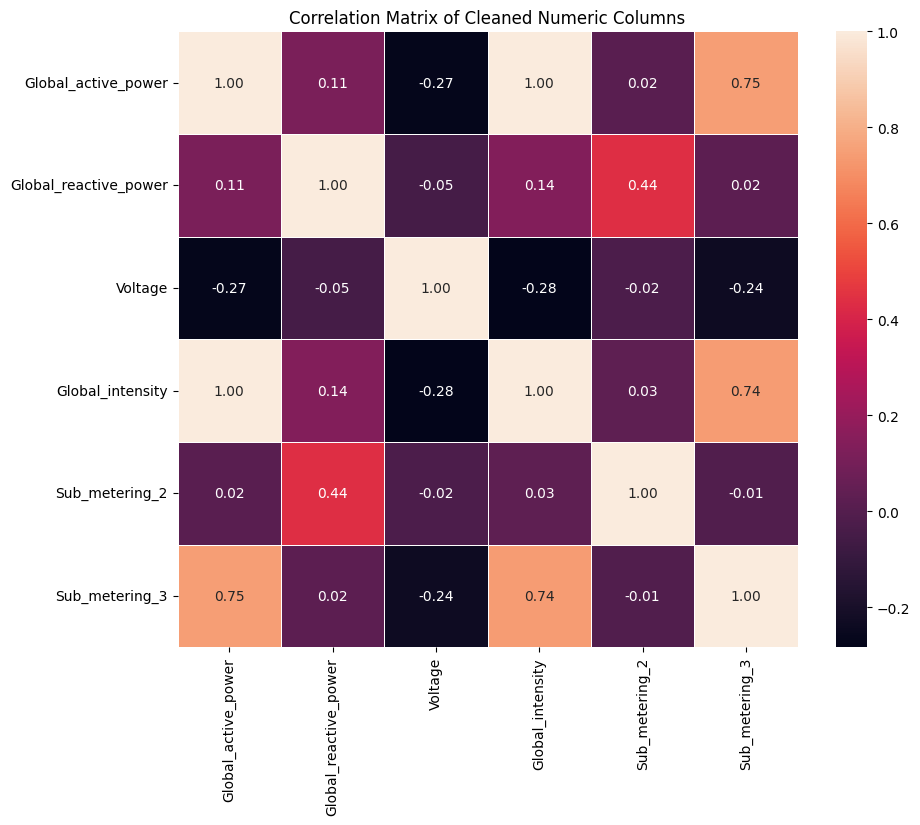

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric columns
numeric_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage',
                'Global_intensity', 'Sub_metering_2', 'Sub_metering_3']

# Compute correlation matrix
corr_matrix = data_cleaned[numeric_cols].corr()

print(corr_matrix)

# Optional: Heatmap visualization
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Cleaned Numeric Columns')
plt.show()



In [12]:
data_cleaned.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:40:00,3.270,0.152,236.73,13.8,0.0,0.0,17.0
1,16/12/2006,17:42:00,3.266,0.000,237.13,13.8,0.0,0.0,18.0
2,16/12/2006,17:49:00,3.248,0.000,236.66,13.6,0.0,0.0,17.0
3,16/12/2006,17:50:00,3.236,0.000,235.84,13.6,0.0,0.0,17.0
4,16/12/2006,17:51:00,3.228,0.000,235.60,13.6,0.0,0.0,17.0


In [13]:
# Exact new features for Date and time
import pandas as pd

# Get the Date column from dataframe
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'], format='%d/%m/%Y')

# Extract features
data_cleaned['Year'] = data_cleaned['Date'].dt.year
data_cleaned['Month'] = data_cleaned['Date'].dt.month
data_cleaned['Day'] = data_cleaned['Date'].dt.day
data_cleaned['Day_of_week'] = data_cleaned['Date'].dt.dayofweek + 1 # 1 is Monday and 7 is Sunday

# Print Date in actual format
data_cleaned['Date'] = data_cleaned['Date'].dt.strftime('%d/%m/%Y')

data_cleaned['Time'] = pd.to_datetime(data_cleaned['Time'], format='%H:%M:%S')

# Extract features
data_cleaned['Hour'] = data_cleaned['Time'].dt.hour
data_cleaned['Minute'] = data_cleaned['Time'].dt.minute
data_cleaned['AM_PM'] = data_cleaned['Time'].dt.strftime('%p')  # AM or PM

# Dispaly time in actual format
data_cleaned['Time'] = pd.to_datetime(data_cleaned['Time'], format='%H:%M:%S').dt.time

# Display the data with new features of date and time
display(data_cleaned.head())


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day,Day_of_week,Hour,Minute,AM_PM
0,16/12/2006,17:40:00,3.270,0.152,236.73,13.8,0.0,0.0,17.0,2006,12,16,6,17,40,PM
1,16/12/2006,17:42:00,3.266,0.000,237.13,13.8,0.0,0.0,18.0,2006,12,16,6,17,42,PM
2,16/12/2006,17:49:00,3.248,0.000,236.66,13.6,0.0,0.0,17.0,2006,12,16,6,17,49,PM
3,16/12/2006,17:50:00,3.236,0.000,235.84,13.6,0.0,0.0,17.0,2006,12,16,6,17,50,PM
4,16/12/2006,17:51:00,3.228,0.000,235.60,13.6,0.0,0.0,17.0,2006,12,16,6,17,51,PM


In [14]:
import pandas as pd

# Ensure Date is in datetime format
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'], format='%d/%m/%Y')

# Group by Date and calculate daily average
daily_avg = data_cleaned.groupby('Date')['Global_active_power'].mean().reset_index()

# Rename the column for clarity
daily_avg.rename(columns={'Global_active_power': 'Daily_average'}, inplace=True)

# Merge the feature to data_cleaned
data_cleaned = data_cleaned.merge(daily_avg, on='Date', how='left')

# Print Date in actual format
data_cleaned['Date'] = data_cleaned['Date'].dt.strftime('%d/%m/%Y')

# Preview the updated dataframe
display(data_cleaned.head())



,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day,Day_of_week,Hour,Minute,AM_PM,Daily_average
0,16/12/2006,17:40:00,3.270,0.152,236.73,13.8,0.0,0.0,17.0,2006,12,16,6,17,40,PM,2.330126
1,16/12/2006,17:42:00,3.266,0.000,237.13,13.8,0.0,0.0,18.0,2006,12,16,6,17,42,PM,2.330126
2,16/12/2006,17:49:00,3.248,0.000,236.66,13.6,0.0,0.0,17.0,2006,12,16,6,17,49,PM,2.330126
3,16/12/2006,17:50:00,3.236,0.000,235.84,13.6,0.0,0.0,17.0,2006,12,16,6,17,50,PM,2.330126
4,16/12/2006,17:51:00,3.228,0.000,235.60,13.6,0.0,0.0,17.0,2006,12,16,6,17,51,PM,2.330126


In [15]:
# Adding peak hour feature
data_cleaned['Daily_peak_hour'] = data_cleaned.groupby('Date')['Global_active_power'].transform(lambda x: data_cleaned.loc[x.idxmax(), 'Hour'])

# Adding rolling average feature(NaN will be added for first few days because of no prior data)
data_cleaned['Rolling_average_sevendays'] = data_cleaned['Global_active_power'].rolling(7).mean()

# Show the dataframe after adding the features
display(data_cleaned)


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day,Day_of_week,Hour,Minute,AM_PM,Daily_average,Daily_peak_hour,Rolling_average_sevendays
0,16/12/2006,17:40:00,3.270,0.152,236.73,13.8,0.0,0.0,17.0,2006,12,16,6,17,40,PM,2.330126,21,NaN
1,16/12/2006,17:42:00,3.266,0.000,237.13,13.8,0.0,0.0,18.0,2006,12,16,6,17,42,PM,2.330126,21,NaN
2,16/12/2006,17:49:00,3.248,0.000,236.66,13.6,0.0,0.0,17.0,2006,12,16,6,17,49,PM,2.330126,21,NaN
3,16/12/2006,17:50:00,3.236,0.000,235.84,13.6,0.0,0.0,17.0,2006,12,16,6,17,50,PM,2.330126,21,NaN
4,16/12/2006,17:51:00,3.228,0.000,235.60,13.6,0.0,0.0,17.0,2006,12,16,6,17,51,PM,2.330126,21,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254860,13/10/2009,04:46:00,0.298,0.090,239.53,1.2,0.0,1.0,1.0,2009,10,13,2,4,46,AM,0.464704,2,0.378571
1254861,13/10/2009,04:47:00,0.294,0.084,239.70,1.2,0.0,2.0,1.0,2009,10,13,2,4,47,AM,0.464704,2,0.363714
1254862,13/10/2009,04:48:00,0.294,0.084,239.82,1.2,0.0,1.0,0.0,2009,10,13,2,4,48,AM,0.464704,2,0.349429
1254863,13/10/2009,04:49:00,0.292,0.082,239.32,1.2,0.0,1.0,1.0,2009,10,13,2,4,49,AM,0.464704,2,0.335143


In [16]:
# Check the columns in data_cleaned
data_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254865 entries, 0 to 1254864
Data columns (total 19 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Date                       1254865 non-null  object 
 1   Time                       1254865 non-null  object 
 2   Global_active_power        1254865 non-null  float64
 3   Global_reactive_power      1254865 non-null  float64
 4   Voltage                    1254865 non-null  float64
 5   Global_intensity           1254865 non-null  float64
 6   Sub_metering_1             1254865 non-null  float64
 7   Sub_metering_2             1254865 non-null  float64
 8   Sub_metering_3             1254865 non-null  float64
 9   Year                       1254865 non-null  int32  
 10  Month                      1254865 non-null  int32  
 11  Day                        1254865 non-null  int32  
 12  Day_of_week                1254865 non-null  int64  
 13  Hour        

In [17]:
pip install scikit-learn

In [18]:
print(data_cleaned.isnull().sum())

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3               0
Year                         0
Month                        0
Day                          0
Day_of_week                  0
Hour                         0
Minute                       0
AM_PM                        0
Daily_average                0
Daily_peak_hour              0
Rolling_average_sevendays    6
dtype: int64


In [19]:
# Mean imputation to avoid NaN values
data_cleaned.fillna(data_cleaned['Rolling_average_sevendays'].mean(),inplace=True)

In [20]:
print(data_cleaned.isnull().sum())

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3               0
Year                         0
Month                        0
Day                          0
Day_of_week                  0
Hour                         0
Minute                       0
AM_PM                        0
Daily_average                0
Daily_peak_hour              0
Rolling_average_sevendays    0
dtype: int64


In [21]:
from sklearn.preprocessing import StandardScaler

# Features to normalize
features_to_normalize = [
    "Global_reactive_power", "Voltage", "Global_intensity",
    "Sub_metering_1", "Sub_metering_2", "Sub_metering_3",
    "Daily_average", "Daily_peak_hour", "Rolling_average_sevendays"
]

# Initialize the scaler
scaler = StandardScaler()

# Apply normalization
data_cleaned[features_to_normalize] = scaler.fit_transform(data_cleaned[features_to_normalize])

In [22]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254865 entries, 0 to 1254864
Data columns (total 19 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Date                       1254865 non-null  object 
 1   Time                       1254865 non-null  object 
 2   Global_active_power        1254865 non-null  float64
 3   Global_reactive_power      1254865 non-null  float64
 4   Voltage                    1254865 non-null  float64
 5   Global_intensity           1254865 non-null  float64
 6   Sub_metering_1             1254865 non-null  float64
 7   Sub_metering_2             1254865 non-null  float64
 8   Sub_metering_3             1254865 non-null  float64
 9   Year                       1254865 non-null  int32  
 10  Month                      1254865 non-null  int32  
 11  Day                        1254865 non-null  int32  
 12  Day_of_week                1254865 non-null  int64  
 13  Hour        

In [23]:
# Feature and Target selection
x=data_cleaned[['Global_reactive_power', 'Voltage', 'Global_intensity','Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'Daily_average', 'Daily_peak_hour', 'Rolling_average_sevendays']]
y=data_cleaned['Global_active_power']

# Splitting process
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
#test_size = 20% data for testing and 80% data for training and randomstate = shuffles randomly b/w data but uniformly

[-1.60586816e-02  8.27392690e-03  6.80062710e-01  3.33066907e-16
 -6.02176739e-04  1.28042602e-02  9.79169759e-04 -1.63114224e-04
  2.84802545e-02]
0.8163163542549698

Mean Absolute Error (MAE): 0.0222
Mean Squared Error (MSE): 0.0011
Root Mean Squared Error (RMSE): 0.0335
R-Squared (R²): 0.9978

Feature Importance:
Global_intensity             6.800627e-01
Rolling_average_sevendays    2.848025e-02
Global_reactive_power       -1.605868e-02
Sub_metering_3               1.280426e-02
Voltage                      8.273927e-03
Daily_average                9.791698e-04
Sub_metering_2              -6.021767e-04
Daily_peak_hour             -1.631142e-04
Sub_metering_1               3.330669e-16
dtype: float64


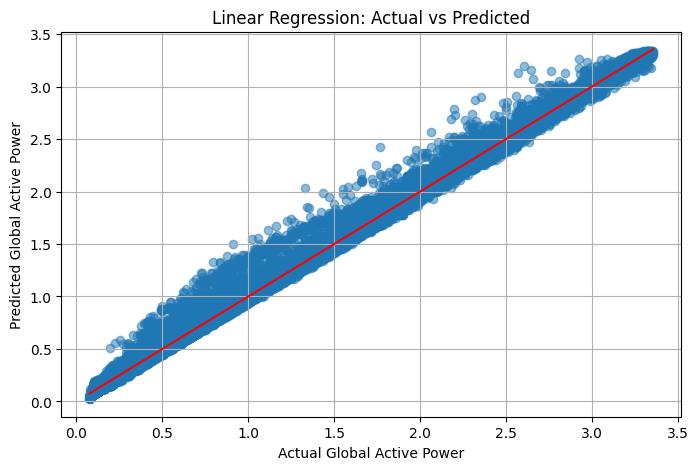

In [24]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Train the model
model = LinearRegression()
model.fit(x_train,y_train)
print(model.coef_) #m value
print(model.intercept_) #c value

# Prediction
y_pred = model.predict(x_test)

# Evaluate Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"\nMean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-Squared (R²): {r2:.4f}") # Accuracy cross check

# Feature Importance
import pandas as pd

coefficients = pd.Series(model.coef_, index=x_train.columns)
print("\nFeature Importance:")
print(coefficients.sort_values(key=abs, ascending=False))

# Visualization
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Global Active Power")
plt.ylabel("Predicted Global Active Power")
plt.title("Linear Regression: Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # identity line
plt.grid(True)
plt.show()

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Train the model
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(x_train, y_train)

RandomForestRegressor()

In [26]:
# Predict on test data
y_pred_rf = rf_model.predict(x_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_rf)

print(f"\nRandom Forest Performance:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-Squared (R²): {r2:.4f}")



Random Forest Performance:
Mean Absolute Error (MAE): 0.0105
Mean Squared Error (MSE): 0.0005
Root Mean Squared Error (RMSE): 0.0224
R-Squared (R²): 0.9990



Feature Importance (Random Forest):
Global_intensity             0.997298
Rolling_average_sevendays    0.000966
Voltage                      0.000486
Global_reactive_power        0.000461
Daily_average                0.000397
Sub_metering_3               0.000211
Daily_peak_hour              0.000149
Sub_metering_2               0.000030
Sub_metering_1               0.000000
dtype: float64


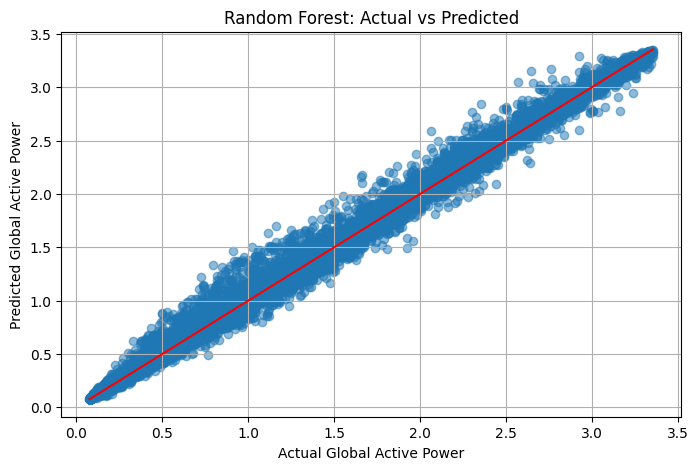

In [27]:
# Feature Importance
importances = pd.Series(rf_model.feature_importances_, index=x_train.columns)
print("\nFeature Importance (Random Forest):")
print(importances.sort_values(ascending=False))

# Visualization: Actual vs Predicted
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel("Actual Global Active Power")
plt.ylabel("Predicted Global Active Power")
plt.title("Random Forest: Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.grid(True)
plt.show()

<ipython-input-40-9ca0beed61b9>:17: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  gb_model.fit(x_train, y_train.ravel())  # .ravel() to convert y_train into 1D array


[2.49744662e-04 1.73089959e-04 9.96413035e-01 0.00000000e+00
 0.00000000e+00 1.70276940e-04 1.73684094e-04 1.96981253e-08
 2.82014924e-03]

Mean Absolute Error (MAE): 0.0174
Mean Squared Error (MSE): 0.0008
Root Mean Squared Error (RMSE): 0.0290
R-Squared (R²): 0.9984

Feature Importance:
Global_intensity             9.964130e-01
Rolling_average_sevendays    2.820149e-03
Global_reactive_power        2.497447e-04
Daily_average                1.736841e-04
Voltage                      1.730900e-04
Sub_metering_3               1.702769e-04
Daily_peak_hour              1.969813e-08
Sub_metering_2               0.000000e+00
Sub_metering_1               0.000000e+00
dtype: float64


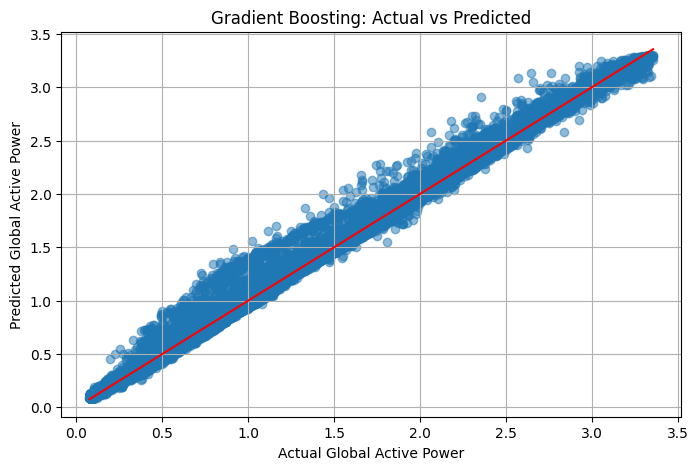

In [40]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Feature and Target selection
x = data_cleaned[['Global_reactive_power', 'Voltage', 'Global_intensity',
                  'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3',
                  'Daily_average', 'Daily_peak_hour', 'Rolling_average_sevendays']]
y = data_cleaned['Global_active_power']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# Train the model using Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
gb_model.fit(x_train, y_train.ravel())  # .ravel() to convert y_train into 1D array

# Feature importance because coefficients is not applicable for gradient booting
print(gb_model.feature_importances_)

# Prediction
y_pred = gb_model.predict(x_test)

# Evaluate Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"\nMean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-Squared (R²): {r2:.4f}") # Accuracy cross check

# Feature Importance
feature_importance = pd.Series(gb_model.feature_importances_, index=x_train.columns)
print("\nFeature Importance:")
print(feature_importance.sort_values(ascending=False))

# Visualization
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Global Active Power")
plt.ylabel("Predicted Global Active Power")
plt.title("Gradient Boosting: Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # identity line
plt.grid(True)
plt.show()


<ipython-input-39-4c2e420d2989>:34: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  grid_search.fit(x_train, y_train.ravel())


Fitting 3 folds for each of 4 candidates, totalling 12 fits

Best Parameters:
{'activation': 'relu', 'learning_rate': 'constant'}

Mean Absolute Error (MAE): 0.0165
Mean Squared Error (MSE): 0.0007
Root Mean Squared Error (RMSE): 0.0270
R-Squared (R²): 0.9986


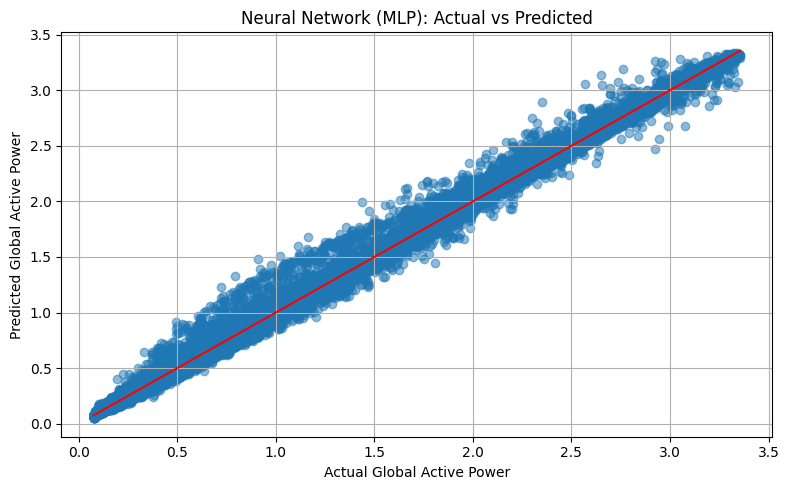

In [39]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Feature and Target selection
x = data_cleaned[['Global_reactive_power', 'Voltage', 'Global_intensity',
                  'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3',
                  'Daily_average', 'Daily_peak_hour', 'Rolling_average_sevendays']]
y = data_cleaned['Global_active_power']

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define parameter grid for hyperparameter tuning
param_grid = {
    'activation': ['relu', 'tanh'],
    'learning_rate': ['constant', 'adaptive']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    MLPRegressor(max_iter=1000, random_state=42),
    param_grid,
    cv=3,
    scoring='r2',
    verbose=1,
    n_jobs=-1
)

# Fit model with Grid Search
grid_search.fit(x_train, y_train.ravel())

# Get the best model
best_nn = grid_search.best_estimator_
print("\nBest Parameters:")
print(grid_search.best_params_)

# Make predictions
y_pred = best_nn.predict(x_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-Squared (R²): {r2:.4f}")

# Visualization: Actual vs Predicted
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Global Active Power")
plt.ylabel("Predicted Global Active Power")
plt.title("Neural Network (MLP): Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.grid(True)
plt.tight_layout()
plt.show()


In [41]:
# Model-performance identification
models = {
    "Linear Regression": model,
    "Random Forest": rf_model,
    "Gradient Boosting": gb_model,
    "Neural Network": grid_search
}

results = {}

for name, model in models.items():
    y_pred = model.predict(x_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MAE": mae, "MSE": mse, "RMSE": rmse, "R²": r2}

# Convert results to DataFrame for easy comparison
import pandas as pd
df_results = pd.DataFrame(results).T
print(df_results)

best_model = df_results.sort_values(by=["R²"], ascending=False).head(1)
print("\nBest Performing Model:")
print(best_model)

                        MAE       MSE      RMSE        R²
Linear Regression  0.017422  0.000840  0.028983  0.998356
Random Forest      0.010471  0.000502  0.022402  0.999018
Gradient Boosting  0.017422  0.000840  0.028983  0.998356
Neural Network     0.016511  0.000727  0.026959  0.998578

Best Performing Model:
                    MAE       MSE      RMSE        R²
Random Forest  0.010471  0.000502  0.022402  0.999018
